<h1 style="background-color: #4CAF50; color: #f2f2f2; text-align: center; padding: 20px;">ANALYSIS OF HEALTH INSURANCE COST</h1>




# Overview of the data

The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.

# Description Of The Columns-

    age: age of the primary beneficiary
    
    sex: insurance contractor gender, female, male
    
    bmi: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9
    
    children: number of children covered by health insurance, number of dependents
    
    smoker: smoking or not
    
    region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.
    
    health_insurance_cost: individual medical costs billed by health insurance

# Question 1-
Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?

# Question 2-
If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?

# Question 3-
Aim to identify patterns in the data and important features that may impact an ML model.

# Question 4-
Perform multiple machine learning models, perform all required steps to check if there are any assumptions, and justify your model. Why is your model better than any other possible model? Please explain it by relevant cost functions and, if possible, by any graph.

# Assumptions
NH-GRADIENT BOOSTING REGRESSOR WILL PERFORM BETTER THAN OTHER 4 ML MODELS

AH-GRADIENT BOOSTING REGRESSOR WILL NOT PERFORM BETTER THAN OTHER 4 ML MODELS

In [1]:
#importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install openpyxl-if not able to open excel file

#Loading the Excel Dataset
df=pd.read_excel("Health_insurance_cost.xlsx")
df.head(2)


#Getting the basic information of the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


# Data Exploration

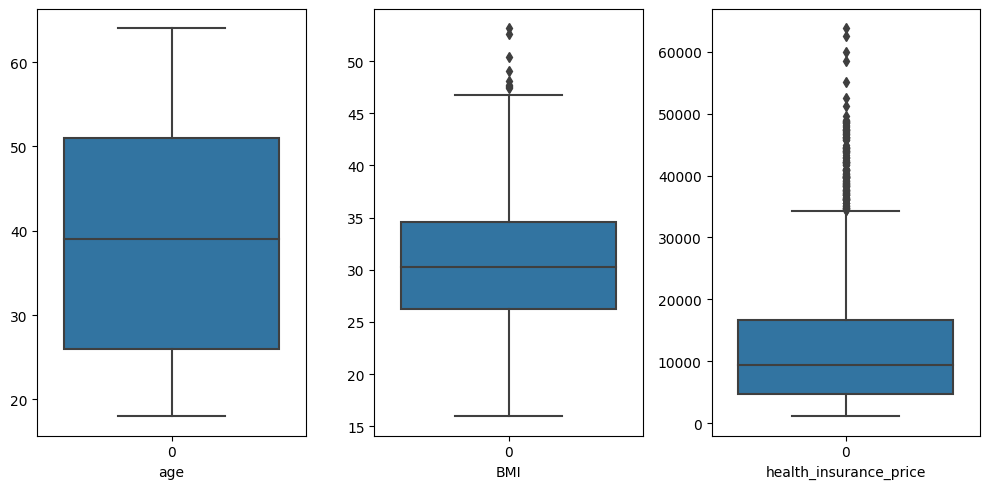

In [2]:
#Checking for outliers
vals=["age","BMI","health_insurance_price"]
fig,axes=plt.subplots(1,len(vals),figsize=(10,5))

for i ,feature in enumerate(vals):
    sns.boxplot(df[feature],ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()


#Outliers in ["BMI","health_insurance_price"]


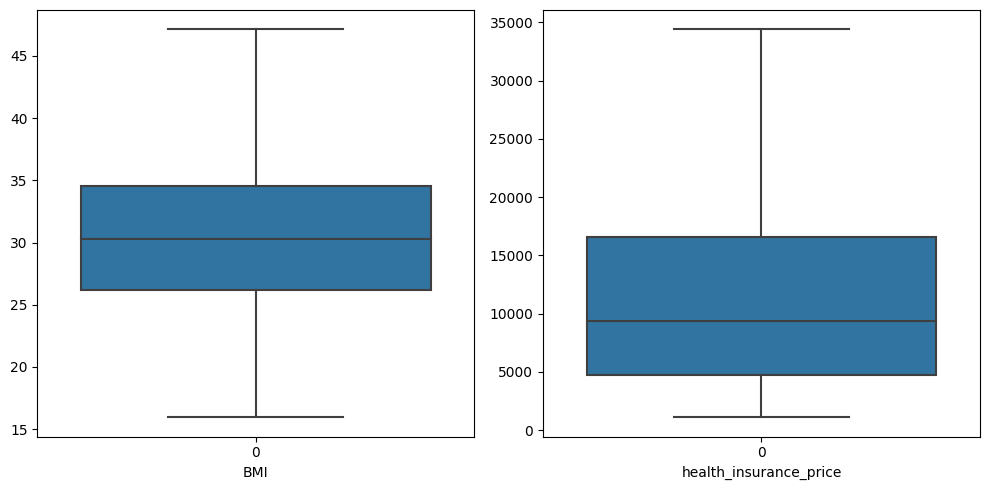

In [3]:
#Fixing the Outliers

for feature in ["BMI","health_insurance_price"]:
    q1=df[feature].quantile(.25)
    q3=df[feature].quantile(.75)
    iqr=q3-q1
    
    lower_lim=q1-(1.5)*iqr
    upper_limit=q3+(1.5)*iqr
    
    df[feature]=df[feature].clip(lower_lim,upper_limit)

#Checking for outliers
vals=["BMI","health_insurance_price"]
fig,axes=plt.subplots(1,len(vals),figsize=(10,5))

for i ,feature in enumerate(vals):
    sns.boxplot(df[feature],ax=axes[i])
    axes[i].set_xlabel(feature)
    
plt.tight_layout()
plt.show()

In [4]:
#Finding the missing values
df.isnull().sum()

#missing value cols=["age","BMI","health_insurance_price"]

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [5]:
#filling the missing values
df["age"]=df["age"].fillna(df["age"].mean())
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())
df["health_insurance_price"]=df["health_insurance_price"].fillna(df["health_insurance_price"].mean())

In [6]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [7]:
#encoding = [gender,smoking_status,location]

df=pd.get_dummies(df,columns=["gender","smoking_status","location"],drop_first=True)
df.head(2)

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,30.623559,0,16884.9240,0,1,0,0,1
1,18.0,33.770000,1,1725.5523,1,0,0,1,0


In [8]:
#Scaling the numbers between 0 - 1

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled = sc.fit_transform(df)
scaled_df = pd.DataFrame(scaled,columns=df.columns)

In [9]:
#Training -Testing-Splitting the data
X=scaled_df.drop(columns=["health_insurance_price"])
y=scaled_df["health_insurance_price"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)


In [10]:
#Applying Different ML Models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regression": RandomForestRegressor(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Gradient Boosting Regression":GradientBoostingRegressor(),
    "XG Boost Regression":XGBRegressor(),
    "Support Vector Regression": SVR()
}

results = {}
for name, model in models.items():
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[("model", model)])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"Mean Squared Error": mse, "Mean Absolute Error": mae, "R-squared": r2}

# Step 5: Compare the performance of each model
results_df = pd.DataFrame(results)
print(results_df)

# Step 6: Select the best-performing model
best_model = results_df.idxmin(axis=1)["Mean Squared Error"]
print("Best Model:", best_model)





                     Linear Regression  Random Forest Regression  \
Mean Squared Error            0.233044                  0.191230   
Mean Absolute Error           0.331655                  0.231751   
R-squared                     0.778567                  0.818297   

                     Decision Tree Regression  Gradient Boosting Regression  \
Mean Squared Error                   0.366381                      0.173911   
Mean Absolute Error                  0.269125                      0.230081   
R-squared                            0.651873                      0.834754   

                     XG Boost Regression  Support Vector Regression  
Mean Squared Error              0.218405                   0.191410  
Mean Absolute Error             0.257851                   0.214791  
R-squared                       0.792476                   0.818127  
Best Model: Gradient Boosting Regression


# Graphical Implementation of the Cost Functions

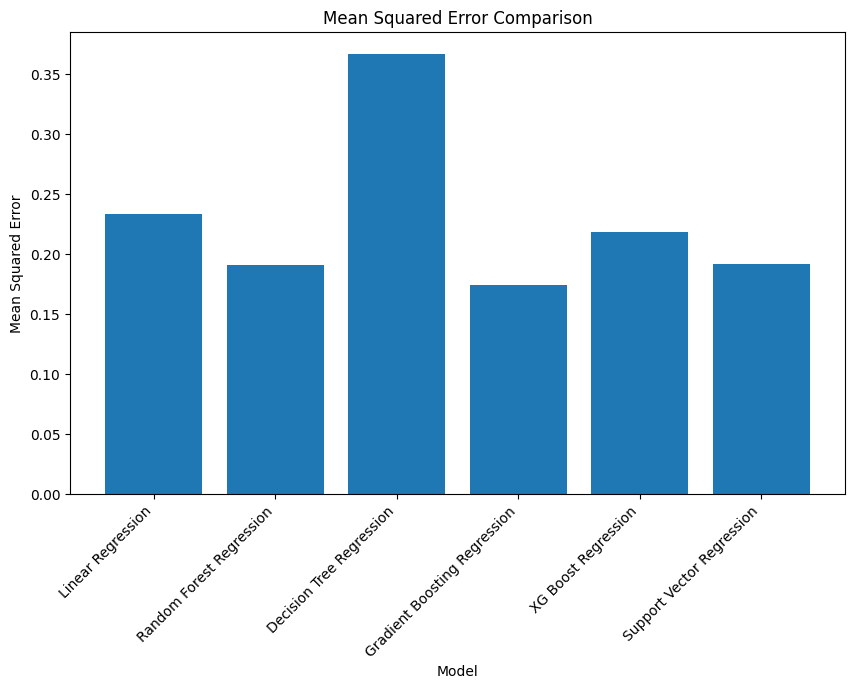

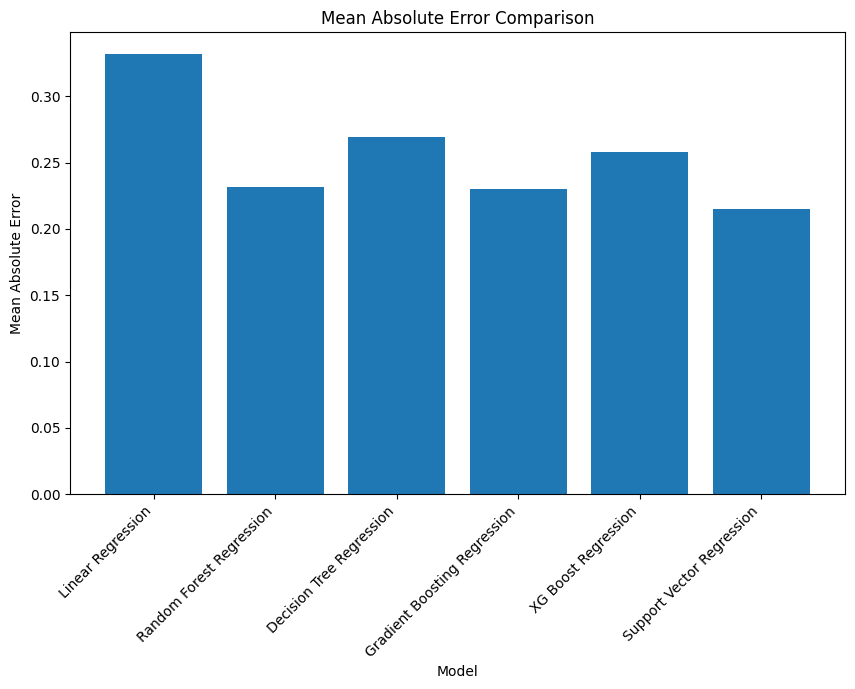

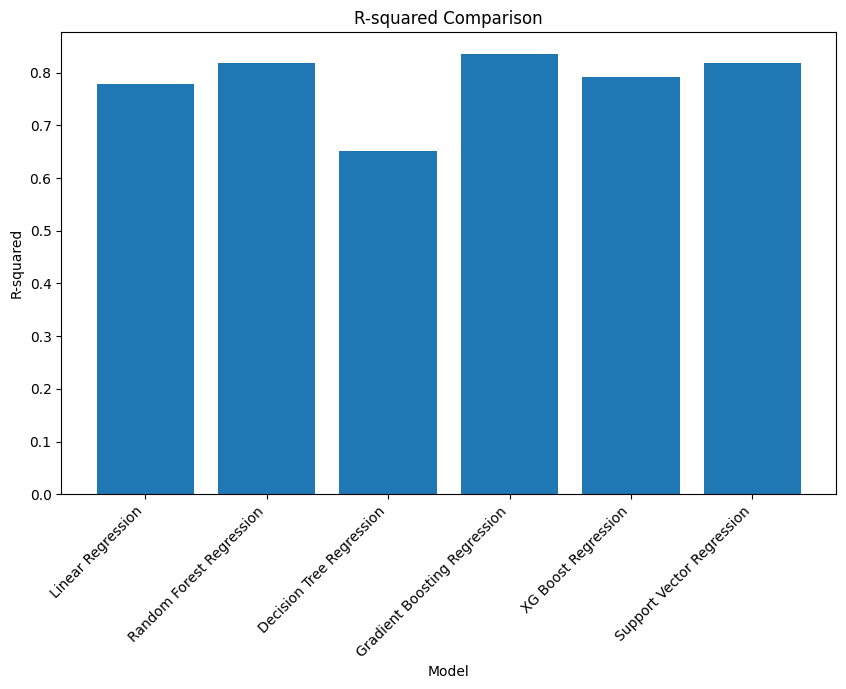

In [11]:
# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["Mean Squared Error"])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error Comparison")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["Mean Absolute Error"])
plt.xlabel("Model")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error Comparison")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# Plotting R-squared (R2)
plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["R-squared"])
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.title("R-squared Comparison")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()



<div style="background-color: #FFA500; color: #000; padding: 20px;">
    <h2 style="text-align: center;">Conclusion</h2>
    <p>As per the following graph we can say that Gradient Boosting Regressor will perform better than any other model, Hence we don't reject the Null Hypothesis(NH).</p>
    <p><strong>Reasons:</strong></p>
    <ol>
        <li>Mean Squared Error (MSE): Gradient Boosting Regressor has the lowest MSE among all models.</li>
        <li>Mean Absolute Error (MAE): Although SVR has the lowest MAE, the MSE of Gradient Boosting Regressor is significantly lower.</li>
        <li>R-squared (R2) Score: Gradient Boosting Regressor has the highest R2 score, indicating a better fit of the model to the data.</li>
    </ol>
</div>

In [14]:
#For better visual please open it in jupyter notebook! Thank You!